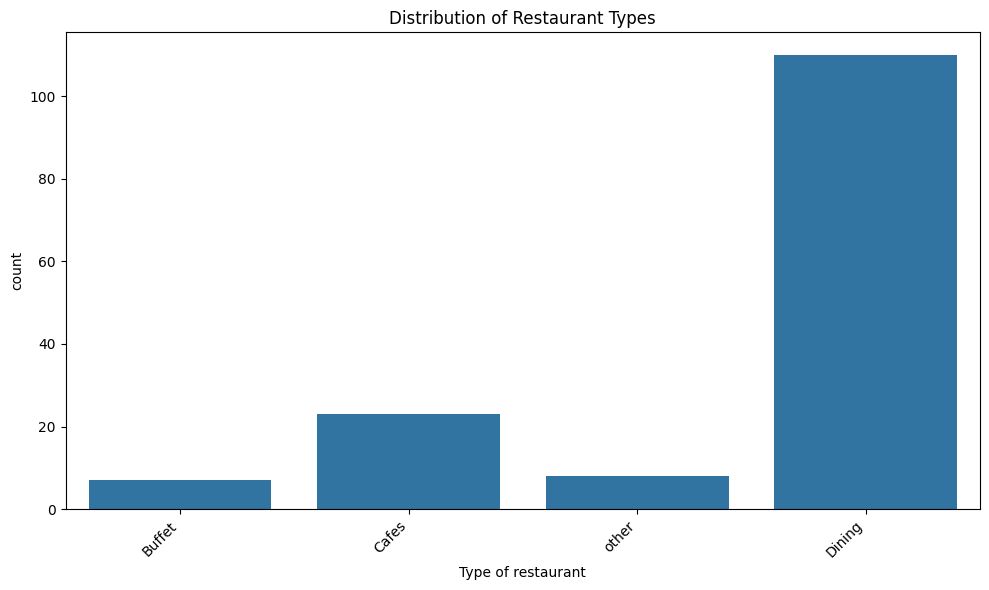

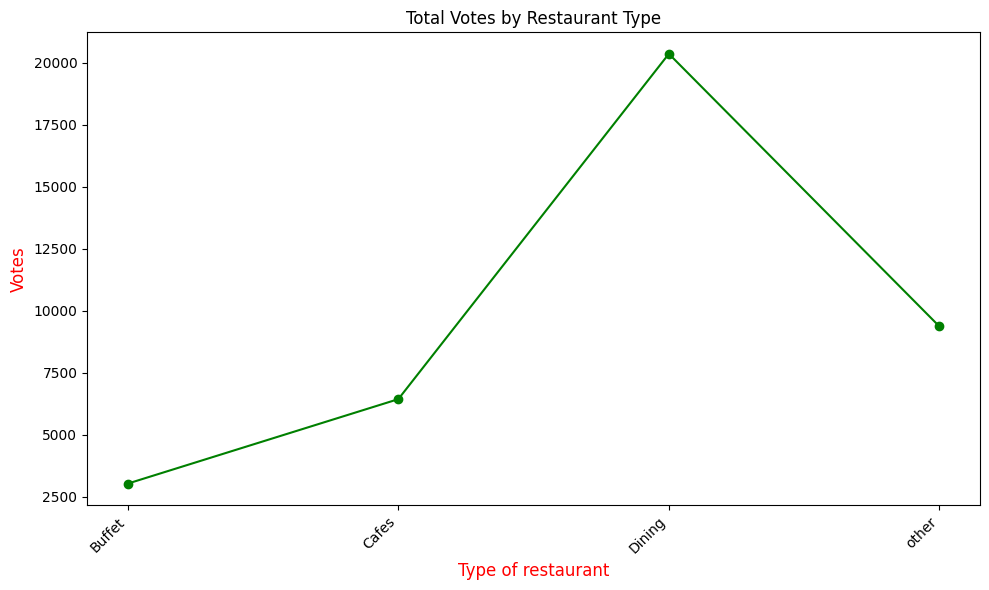

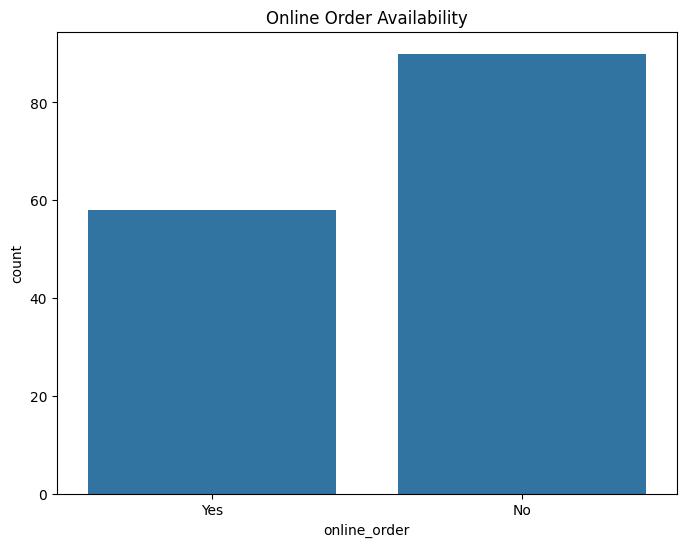

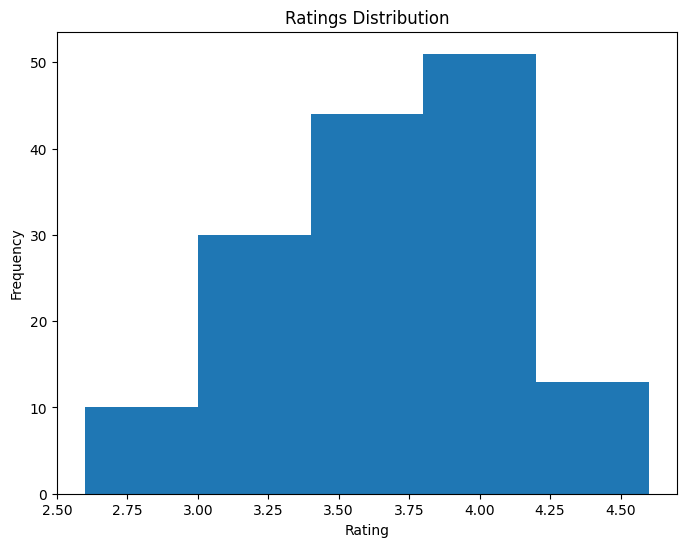

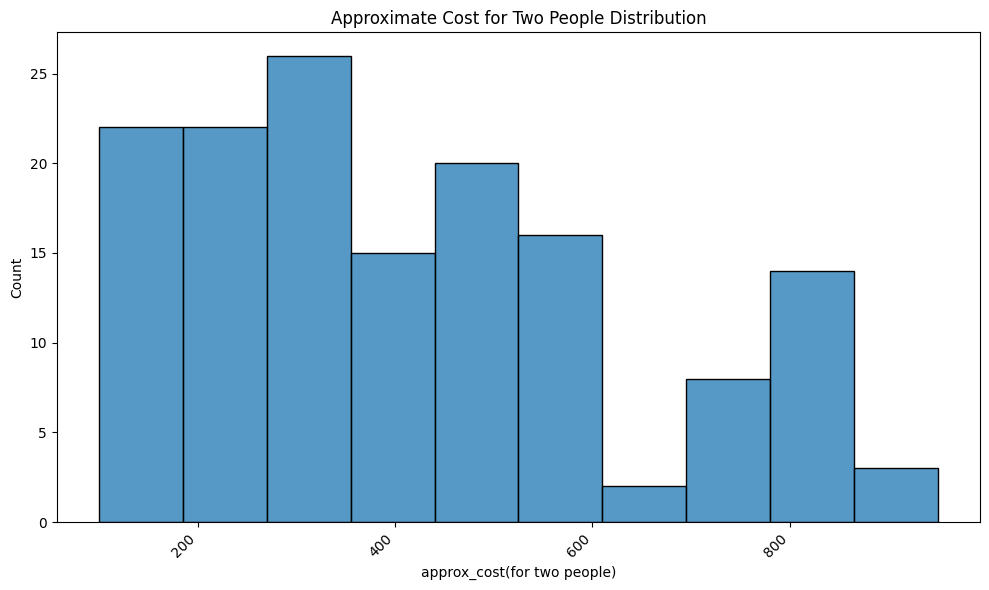

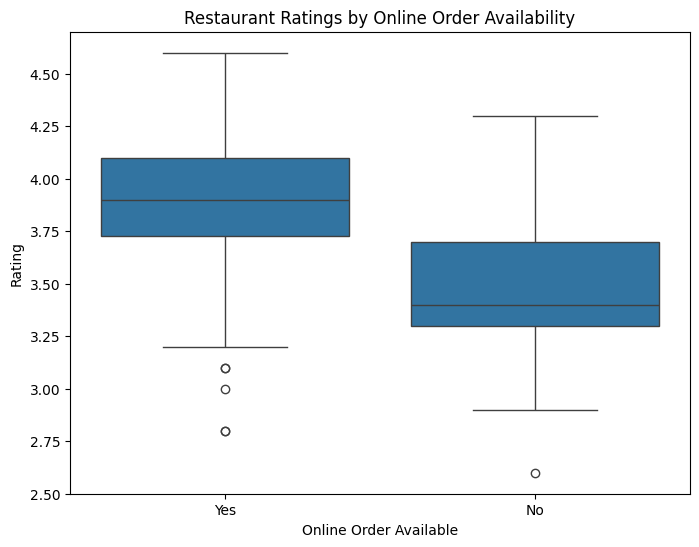

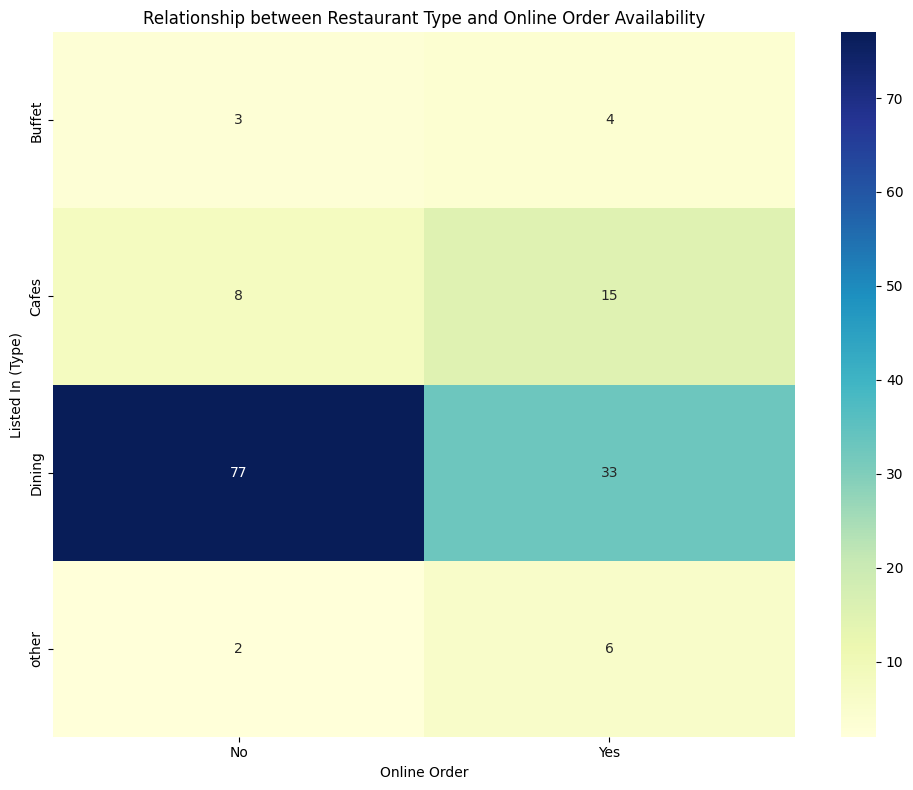

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# IMPORTANT: Replace "Zomato-data- (1).csv" with the actual path to your CSV file
try:
    dataframe = pd.read_csv("/content/Zomato-data- (1).csv", sep=',') # Corrected separator to comma
except FileNotFoundError:
    print("Error: 'Zomato-data- (1).csv' not found. Please provide the correct path to your CSV file.")
    exit()

# print(dataframe.head()) # Commented out as user doesn't want output

# print("\nDataFrame Columns after loading CSV:") # Commented out as user doesn't want output
# print(dataframe.columns) # Commented out as user doesn't want output
# ---------------------------------------------

def handleRate(value):
    # Ensure value is treated as a string before splitting
    value_str = str(value)
    if '/' in value_str:
        value = value_str.split('/')[0]
    else:
        value = value_str # If no '/', take the value as is (e.g., if it's already just a number)
    try:
        return float(value)
    except ValueError:
        # Handle cases where conversion to float might fail (e.g., empty string, non-numeric)
        return np.nan # Return NaN for unconvertible values

dataframe['rate'] = dataframe['rate'].apply(handleRate)
# print("\nDataFrame head after handling 'rate' column:") # Commented out as user doesn't want output
# print(dataframe.head()) # Commented out as user doesn't want output

# dataframe.info() # Commented out as user doesn't want output

# Add plt.show() after each plot to display them in environments like Colab
plt.figure(figsize=(10, 6))
sns.countplot(x=dataframe['listed_in(type)'])
plt.xlabel("Type of restaurant")
plt.title("Distribution of Restaurant Types") # Add a title for clarity
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

grouped_data = dataframe.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes': grouped_data})
plt.figure(figsize=(10, 6))
plt.plot(result, c='green', marker='o')
plt.xlabel('Type of restaurant', c='red', size=12) # Reduced size for better fit
plt.ylabel('Votes', c='red', size=12)
plt.title("Total Votes by Restaurant Type")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

max_votes = dataframe['votes'].max()
restaurant_with_max_votes = dataframe.loc[dataframe['votes'] == max_votes, 'name']

# print('\nRestaurant(s) with the maximum votes:') # Commented out as user doesn't want output
# print(restaurant_with_max_votes) # Commented out as user doesn't want output

plt.figure(figsize=(8, 6))
sns.countplot(x=dataframe['online_order'])
plt.title("Online Order Availability")
plt.show()

plt.figure(figsize=(8, 6))
plt.hist(dataframe['rate'].dropna(), bins=5) # Use .dropna() to exclude NaN values from histogram
plt.title('Ratings Distribution')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

# Convert 'approx_cost(for two people)' to numeric, removing commas and coercing errors to NaN
dataframe['approx_cost(for two people)'] = dataframe['approx_cost(for two people)'].astype(str).str.replace(',', '', regex=False).astype(float)

plt.figure(figsize=(10, 6))
sns.histplot(x=dataframe['approx_cost(for two people)'].dropna(), bins=10) # Drop NA values for plotting
plt.title("Approximate Cost for Two People Distribution")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


plt.figure(figsize = (8,6))
sns.boxplot(x = 'online_order', y = 'rate', data = dataframe)
plt.title("Restaurant Ratings by Online Order Availability")
plt.xlabel("Online Order Available")
plt.ylabel("Rating")
plt.show()

pivot_table = dataframe.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Relationship between Restaurant Type and Online Order Availability')
plt.xlabel('Online Order')
plt.ylabel('Listed In (Type)')
plt.tight_layout()
plt.show()